# K- Means Clustering
This notebook will walk through some of the basics of K-Means Clustering

In [1]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Load the iris dataset

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Finding the optimum number of clusters for KMeans and determining the value of K!

In [3]:
x = iris_df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
a = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    k_means.fit(x)
    a.append(k_means.inertia_)

In [4]:
print(a) #printing the interia values for every iteraton of KMeans asn_init is 10 we get 10 values, generally R^2 error
print(k_means.score(x)) #score is the score of the best fit cluster, note that interia_'s last vlaue and score are same, except score is negative

[681.3705999999996, 152.34795176035797, 78.851441426146, 57.25600931571815, 46.44618205128204, 39.03998724608725, 34.299712121212146, 30.014398496240617, 28.03690635345049, 26.534529220779234]
-26.53452922077923


You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

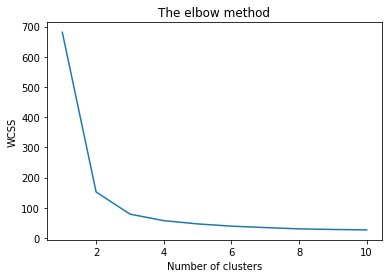

In [5]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'

plt.plot(range(1, 11), a)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [6]:
k_means1 = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, random_state = 0)
y_pred = k_means1.fit_predict(x) #Labels every instance of 'x' into its closest cluster using instances' distance between each cluster.
len(y_pred) #As the dataset is of length 150

150

### Visualising the clusters - On the first two columns

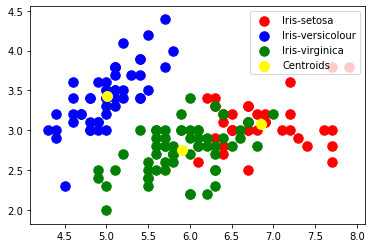

In [7]:
plt.scatter(x[y_pred == 0,0], x[y_pred == 0,1], s=90, c='red', label= 'Iris-setosa')
plt.scatter(x[y_pred == 1,0], x[y_pred == 1,1], s=90, c="blue", label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2,0], x[y_pred == 2,1], s=90, c="green", label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k_means1.cluster_centers_[:, 0], k_means1.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend(loc='upper right')

#### This concludes the basics K-Means Workshop.